This notebook is for when you have used envs_plotter to plot individual simulation statistics for various loads, and now wish to do some plots across multiple **simulation repeats** for go get the **mean and spread** values of each parameter. Note that this notebook requires you having set a path_to_save string when calling envs_plotter so that an envs_plotter_<sim_name> directory contains a summary_dataframe.pkl file for each of the simulation repetitions (summary_dataframe.pkl files are generated via the EnvsPlotter construct_tables() method).

Will save the mean and std dataframes in <folder>_mean (in same location as folders containing the summary_dataframe.pkl files used)

In [9]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get paths to summary data frame pickle files which you want to average

In [30]:
%autoreload

# init base folder
base_path = '/rdata/ong/trafpy/management/flowcentric/'
versions = ['', '_v2', '_v3', '_v4', '_v5'] # each version is a repetition

sims = ['rack_dist_sensitivity_{}'.format(param) for param in [0.2, 0.4, 0.6, 0.8]]
# sims = ['skewed_nodes_sensitivity_{}'.format(param) for param in [0, 0.05, 0.1, 0.2, 0.4]]
# sims = ['university', 'private_enterprise', 'commercial_cloud', 'social_media_cloud']

# for each sim, init list of paths to summary_dataframe.pkl files -> will use for finding mean & std
summary_dataframe_paths = {sim: [] for sim in sims}
sim_names = {} # store simulation names w/o any verison
for sim in sims:
    sim_name = '{}_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data'.format(sim)
    if sim not in sim_names:
        # init this sim name in sim_names dict
        # dont include version in folder name, add _mean at end
        folder = sim_name + '_mean'
        sim_names[sim] = base_path+folder
    for version in versions:
        # get path to summary_dataframe for this sim version/repetition
        folder = sim_name + version
        path = base_path+folder+'/envs_plotter_'+folder+'/summary_dataframe.pkl'
        summary_dataframe_paths[sim].append(path)
print(summary_dataframe_paths)

{'rack_dist_sensitivity_0.2': ['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/envs_plotter_rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/summary_dataframe.pkl', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2/envs_plotter_rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2/summary_dataframe.pkl', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v3/envs_plotter_rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v3/summary_dataframe.pkl', '/rdata/ong/trafpy/management/

## Load these pickles as data frames

In [31]:
%autoreload
import pandas as pd


# compute and save summary tables/dataframes then load dataframes and convert to dicts
summary_dicts = {sim: [] for sim in summary_dataframe_paths.keys()}
for sim in summary_dataframe_paths.keys():
    for version in range(len(summary_dataframe_paths[sim])):
        summary_dicts[sim].append(pd.read_pickle(summary_dataframe_paths[sim][version]).to_dict())
print(summary_dicts.keys())
print(summary_dicts[list(summary_dicts.keys())[0]][0])

dict_keys(['rack_dist_sensitivity_0.2', 'rack_dist_sensitivity_0.4', 'rack_dist_sensitivity_0.6', 'rack_dist_sensitivity_0.8'])
{'Load': {0: 0.1, 1: 0.1, 2: 0.1, 3: 0.1, 4: 0.2, 5: 0.2, 6: 0.2, 7: 0.2, 8: 0.3, 9: 0.3, 10: 0.3, 11: 0.3, 12: 0.4, 13: 0.4, 14: 0.4, 15: 0.4, 16: 0.5, 17: 0.5, 18: 0.5, 19: 0.5, 20: 0.6, 21: 0.6, 22: 0.6, 23: 0.6, 24: 0.7, 25: 0.7, 26: 0.7, 27: 0.7, 28: 0.8, 29: 0.8, 30: 0.8, 31: 0.8, 32: 0.9, 33: 0.9, 34: 0.9, 35: 0.9}, 'Subject': {0: 'FF', 1: 'FS', 2: 'Rand', 3: 'SRPT', 4: 'FF', 5: 'FS', 6: 'Rand', 7: 'SRPT', 8: 'FF', 9: 'FS', 10: 'Rand', 11: 'SRPT', 12: 'FF', 13: 'FS', 14: 'Rand', 15: 'SRPT', 16: 'FF', 17: 'FS', 18: 'Rand', 19: 'SRPT', 20: 'FF', 21: 'FS', 22: 'Rand', 23: 'SRPT', 24: 'FF', 25: 'FS', 26: 'Rand', 27: 'SRPT', 28: 'FF', 29: 'FS', 30: 'Rand', 31: 'SRPT', 32: 'FF', 33: 'FS', 34: 'Rand', 35: 'SRPT'}, 'T-Score': {0: -618.6611113920703, 1: -590.798093977899, 2: -595.7845592815532, 3: -589.1599404508127, 4: -461.09430604389286, 5: -383.3017256987019

## Create mean, std, margin of error, and winner tables

In [32]:
%autoreload
import numpy as np
from IPython.display import display
import os
import shutil
import copy
import sigfig

# create new mean_summary_dataframe.pkl file, which is mean of stats across the multiple repetitions
# also find corresponding std for each stat for error bars in plots

# init table for storing mean data
mean_summary_dicts = {}
for sim in summary_dicts.keys():
    mean_summary_dicts[sim] = {}
    mean_summary_dicts[sim]['Load'] = summary_dicts[sim][0]['Load']
    mean_summary_dicts[sim]['Subject'] = summary_dicts[sim][0]['Subject']
    for param in summary_dicts[list(summary_dicts.keys())[0]][0]:
        if param != 'Subject' and param != 'Load':
            mean_summary_dicts[sim][param] = {}
            
# init tables for storing std, error, and mean w/ error data
std_summary_dicts = copy.deepcopy(mean_summary_dicts) # standard deviation
z_value = 1.96 # 1.96 if want 95% confidence interval
error_summary_dicts = copy.deepcopy(mean_summary_dicts) # margin of error
mean_with_error_summary_dicts = copy.deepcopy(mean_summary_dicts) # mean +- margin of error

# init winner table
winner_summary_dicts = {}
for sim in summary_dicts.keys():
    winner_summary_dicts[sim] = {}
    winner_summary_dicts[sim]['Load'] = list(np.unique(list(summary_dicts[sim][0]['Load'].values())))
    for param in summary_dicts[list(summary_dicts.keys())[0]][0]:
        if param != 'Subject' and param != 'Load' and param != 'T-Score' and 'Throughput (' not in param:
            winner_summary_dicts[sim][param] = []


# calculate mean, std, error, and winner for each stat
subjects = np.unique(sorted(list(summary_dicts[sim][0]['Subject'].values())))
for sim in summary_dicts.keys():
    for param in mean_summary_dicts[sim].keys():
        mean_subject_values = [] # param values for each subject -> use for winner table
        counter = 0 # counter for knowing when have reached a new batch of loads -> use for winner table
        for idx in range(len(summary_dicts[list(summary_dicts.keys())[0]][0]['Load'])):
            counter += 1
            if param == 'Subject':
                # already added above
                pass
            else:
                subject = mean_summary_dicts[sim]['Subject'][idx]
                values = []
                for version in range(len(summary_dicts[sim])):
                    # N.B. If get KeyError here, then have not ran and saved all loads for at least 1 of the sims
                    if summary_dicts[sim][version]['Subject'][idx] != subject:
                        raise Exception('Subject orders are different in summary_dicts. Ensure all summary dicts have the same subject order.')
                    values.append(summary_dicts[sim][version][param][idx])
                if 'Mean' in param or 'p99' in param or 'Max' in param:
                    mean = round(float(np.mean(values)), 1)
                    std = round(float(np.std(values)), 1)
                elif 'Throughput Frac' in param:
                    mean = sigfig.round(float(np.mean(values)), sigfigs=6)
                    std = sigfig.round(float(np.std(values)), sigfigs=6)
                elif param == 'Load':
                    mean = round(float(np.mean(values)), 2)
                    std = round(float(np.std(values)), 2)
                else:
                    mean = sigfig.round(float(np.mean(values)), sigfigs=3)
                    std = sigfig.round(float(np.std(values)), sigfigs=3)  
                
                mean_summary_dicts[sim][param][idx] = mean
                std_summary_dicts[sim][param][idx] = std
                
                mean_subject_values.append(mean)
                
                if param != 'Load':
                    error = sigfig.round(z_value * (std/len(values)))
                    percent_error = sigfig.round((error/mean)*100, 2)
                    error_summary_dicts[sim][param][idx] = error
#                     mean_with_error_summary_dicts[sim][param][idx] = '{}\u00B1{}%'.format(mean, percent_error)
                    mean_with_error_summary_dicts[sim][param][idx] = '{}$\pm${}$\%$'.format(mean, percent_error)
                    
                if counter == len(subjects):
                    # update winner table for this batch of loads
                    if param != 'T-Score' and param != 'Load' and param != 'Subject' and 'Throughput (' not in param:
                        # update winner table
                        if 'Throughput' in param or 'Accepted' in param:
                            # higher is better
                            ranking_indices = np.argsort(mean_subject_values)[::-1]
                        else:
                            # lower is better
                            ranking_indices = np.argsort(mean_subject_values)
                        ranking_vals = np.asarray(mean_subject_values)[ranking_indices]
                        ranking_subjects = np.asarray(subjects)[ranking_indices]

                        # find loser -> make this baseline
                        baseline_val, baseline_subject = ranking_vals[-1], ranking_subjects[-1]

                        # find performance improvement of other classes relative to baseline
                        relative_perf = []
                        for val in ranking_vals[:-1]:
                            diff = val - baseline_val
                            if diff != 0:
                                perf = sigfig.round(float((diff / baseline_val) * 100), sigfigs=4)
                            else:
                                # same perf as baseline val
                                perf = 0
                            relative_perf.append(perf)

                        # find winner(s)
                        winner_indices = sorted([u for u, v in enumerate(mean_subject_values) if v == ranking_vals[0]])
                        winner = subjects[winner_indices[0]]
                        if len(winner_indices) > 1:
                            for winner_idx in winner_indices[1:]:
                                winner = winner + '+' + subjects[winner_idx]

                        # add winner(s) and relative performance improvement to winner table
                        winner_summary_dicts[sim][param].append('{}, {}$\%$'.format(winner, relative_perf[0]))
                        
                    # re-set mean values and counter for next batch of loads
                    mean_subject_values, counter = [], 0
            

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


## Display these tables and save latex versions of them

In [36]:
%autoreload
import copy

# create dataframes and save in new folder ending in <folder>_mean, where <folder> is same as sim_name folder used above for each sim
for sim in mean_summary_dicts.keys():
    
    print('\n\n\nSim {} summary'.format(sim))
    
    # re-format mean+error table column titles for paper
    _dict = copy.deepcopy(mean_with_error_summary_dicts[sim])
    keys = _dict.keys()
    for param in keys:
        updated_param = param
        if 'Mean' in param:
            updated_param = 'Mean FCT ($\mu$s)'
        elif 'p99' in param:
            updated_param = 'p99 FCT ($\mu$s)'
        elif 'Max' in param:
            updated_param = 'Max FCT ($\mu$s)'
        elif 'Throughput' == param:
            updated_param = 'Throughput (Frac)'
        elif 'Throughput (B' in param:
            updated_param = 'Throughput (B/$\mu$s)'
        elif 'Flows Accepted' in param:
            updated_param = 'Flows Accepted (Frac)'
        elif 'Info Accepted' in param:
            updated_param = 'Info Accepted (Frac)'
        else:
            # don't need to adjust
            pass
        mean_with_error_summary_dicts[sim][updated_param] = mean_with_error_summary_dicts[sim].pop(param)
    
    # re-format winner table column titles for paper
    _dict = copy.deepcopy(winner_summary_dicts[sim])
    keys = _dict.keys()
    for param in keys:
        updated_param = param
        if 'Mean' in param:
            updated_param = 'Mean FCT'
        elif 'p99' in param:
            updated_param = 'p99 FCT'
        elif 'Max' in param:
            updated_param = 'Max FCT'
        elif 'Flows Accepted' in param:
            updated_param = 'Flows Accepted'
        elif 'Info Accepted' in param:
            updated_param = 'Info Accepted'
        else:
            # don't need to adjust
            pass
        winner_summary_dicts[sim][updated_param] = winner_summary_dicts[sim].pop(param)
    
    
    # generate dataframes
    mean_summary_dataframe = pd.DataFrame(mean_summary_dicts[sim])
    std_summary_dataframe = pd.DataFrame(std_summary_dicts[sim])
    error_summary_dataframe = pd.DataFrame(error_summary_dicts[sim])
    mean_with_error_summary_dataframe = pd.DataFrame(mean_with_error_summary_dicts[sim]).drop('T-Score', axis=1)
    winner_summary_dataframe = pd.DataFrame(winner_summary_dicts[sim])
    
    # save dataframes as pickles
    if os.path.exists(sim_names[sim]):
        shutil.rmtree(sim_names[sim])
    os.mkdir(sim_names[sim])
    mean_summary_dataframe.to_pickle(sim_names[sim]+'/mean_summary_dataframe.pkl')
    std_summary_dataframe.to_pickle(sim_names[sim]+'/std_summary_dataframe.pkl')
    error_summary_dataframe.to_pickle(sim_names[sim]+'/error_summary_dataframe.pkl')
    winner_summary_dataframe.to_pickle(sim_names[sim]+'/mean_winner_summary_dataframe.pkl')
    mean_with_error_summary_dataframe.to_pickle(sim_names[sim]+'/mean_with_error_summary_dataframe.pkl')
    
    # save dataframes as latex tables
    latex_mean_summary_dataframe = copy.deepcopy(mean_summary_dataframe.drop('T-Score', axis=1))
    latex_mean_summary_dataframe.to_latex(index=False, multicolumn=True, buf=sim_names[sim]+'/latex_mean_summary_table', escape=False)
    latex_std_summary_dataframe = copy.deepcopy(std_summary_dataframe.drop('T-Score', axis=1))
    latex_std_summary_dataframe.to_latex(index=False, multicolumn=True, buf=sim_names[sim]+'/latex_std_summary_table', escape=False)  
    latex_winner_summary_dataframe = copy.deepcopy(winner_summary_dataframe)
    latex_winner_summary_dataframe.to_latex(index=False, multicolumn=True, buf=sim_names[sim]+'/latex_mean_winner_summary_table', escape=False)
    latex_mean_with_error_summary_dataframe = copy.deepcopy(mean_with_error_summary_dataframe.drop('Throughput (B/$\mu$s)', axis=1))
    latex_mean_with_error_text = latex_mean_with_error_summary_dataframe.to_latex(index=False, multicolumn=True, buf=sim_names[sim]+'/latex_mean_with_error_summary_table', escape=False)
    
    # display
    print('{} mean:'.format(sim))
    display(mean_summary_dataframe)
    print('{} margin of error:'.format(sim))
    display(error_summary_dataframe)
    print('{} mean with error:'.format(sim))
    display(mean_with_error_summary_dataframe)
    print(latex_mean_with_error_summary_dataframe.to_latex(index=False, multicolumn=True, escape=False))
    print('{} mean winner table:'.format(sim))
    display(winner_summary_dataframe)
    print(latex_winner_summary_dataframe.to_latex(index=False, multicolumn=True, escape=False))




Sim rack_dist_sensitivity_0.2 summary
rack_dist_sensitivity_0.2 mean:


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-140.0,1547.1,2905.6,36420.2,0.993,3930.0,0.999,0.993
1,0.10,FS,-121.0,1514.8,1997.1,35026.4,0.994,3930.0,0.999,0.994
2,0.10,Rand,-129.0,1538.9,2708.2,53118.6,0.991,3920.0,0.999,0.991
3,0.10,SRPT,-121.0,1514.5,1997.6,35426.4,0.994,3930.0,0.999,0.994
4,0.20,FF,-150.0,1613.3,4210.8,43491.3,0.985,7820.0,0.999,0.985
5,0.20,FS,-84.9,1522.9,1998.9,38988.6,0.986,7820.0,1.000,0.986
6,0.20,Rand,-111.0,1575.6,3009.0,70182.4,0.978,7760.0,0.999,0.978
7,0.20,SRPT,-82.8,1524.5,2252.2,41095.6,0.987,7830.0,1.000,0.987
8,0.30,FF,-197.0,1751.4,6744.9,67480.0,0.989,11800.0,0.999,0.989
9,0.30,FS,-116.0,1534.7,2247.8,63424.2,0.990,11800.0,0.999,0.990


rack_dist_sensitivity_0.2 margin of error:


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.1,FF,94.080,3.0576,15.3272,1366.6688,0.002309,15.9936,0.000466,0.002309
1,0.1,FS,92.120,2.1952,0.1176,895.5240,0.002250,15.6408,0.000459,0.002250
2,0.1,Rand,91.728,2.3520,9.4472,1528.8392,0.002058,14.2688,0.000455,0.002058
3,0.1,SRPT,91.728,2.1952,0.1568,908.7736,0.002215,15.5232,0.000455,0.002215
4,0.2,FF,65.072,2.5088,44.3352,1431.8192,0.003391,30.2232,0.000322,0.003391
5,0.2,FS,58.408,2.1952,0.2352,638.4896,0.003642,31.1640,0.000290,0.003642
6,0.2,Rand,58.800,3.1360,23.2848,1791.3224,0.004390,47.0400,0.000292,0.004390
7,0.2,SRPT,57.232,2.0776,23.5592,641.3120,0.003073,31.3208,0.000283,0.003073
8,0.3,FF,83.496,13.9160,258.3280,6423.3120,0.001678,31.0464,0.000416,0.001678
9,0.3,FS,83.496,2.0384,12.6224,4581.3824,0.001697,26.9696,0.000416,0.001697


rack_dist_sensitivity_0.2 mean with error:


,Load,Subject,Mean FCT ($\mu$s),p99 FCT ($\mu$s),Max FCT ($\mu$s),Throughput (Frac),Throughput (B/$\mu$s),Flows Accepted (Frac),Info Accepted (Frac)
0,0.1,FF,1547.1$\pm$0.2$\%$,2905.6$\pm$0.53$\%$,36420.2$\pm$3.8$\%$,0.993$\pm$0.23$\%$,3930.0$\pm$0.41$\%$,0.999$\pm$0.047$\%$,0.993$\pm$0.23$\%$
1,0.1,FS,1514.8$\pm$0.14$\%$,1997.1$\pm$0.0059$\%$,35026.4$\pm$2.6$\%$,0.994$\pm$0.23$\%$,3930.0$\pm$0.4$\%$,0.999$\pm$0.046$\%$,0.994$\pm$0.23$\%$
2,0.1,Rand,1538.9$\pm$0.15$\%$,2708.2$\pm$0.35$\%$,53118.6$\pm$2.9$\%$,0.991$\pm$0.21$\%$,3920.0$\pm$0.36$\%$,0.999$\pm$0.046$\%$,0.991$\pm$0.21$\%$
3,0.1,SRPT,1514.5$\pm$0.14$\%$,1997.6$\pm$0.0078$\%$,35426.4$\pm$2.6$\%$,0.994$\pm$0.22$\%$,3930.0$\pm$0.39$\%$,0.999$\pm$0.046$\%$,0.994$\pm$0.22$\%$
4,0.2,FF,1613.3$\pm$0.16$\%$,4210.8$\pm$1.1$\%$,43491.3$\pm$3.3$\%$,0.985$\pm$0.34$\%$,7820.0$\pm$0.39$\%$,0.999$\pm$0.032$\%$,0.985$\pm$0.34$\%$
5,0.2,FS,1522.9$\pm$0.14$\%$,1998.9$\pm$0.012$\%$,38988.6$\pm$1.6$\%$,0.986$\pm$0.37$\%$,7820.0$\pm$0.4$\%$,1.0$\pm$0.029$\%$,0.986$\pm$0.37$\%$
6,0.2,Rand,1575.6$\pm$0.2$\%$,3009.0$\pm$0.77$\%$,70182.4$\pm$2.6$\%$,0.978$\pm$0.45$\%$,7760.0$\pm$0.61$\%$,0.999$\pm$0.029$\%$,0.978$\pm$0.45$\%$
7,0.2,SRPT,1524.5$\pm$0.14$\%$,2252.2$\pm$1.0$\%$,41095.6$\pm$1.6$\%$,0.987$\pm$0.31$\%$,7830.0$\pm$0.4$\%$,1.0$\pm$0.028$\%$,0.987$\pm$0.31$\%$
8,0.3,FF,1751.4$\pm$0.79$\%$,6744.9$\pm$3.8$\%$,67480.0$\pm$9.5$\%$,0.989$\pm$0.17$\%$,11800.0$\pm$0.26$\%$,0.999$\pm$0.042$\%$,0.989$\pm$0.17$\%$
9,0.3,FS,1534.7$\pm$0.13$\%$,2247.8$\pm$0.56$\%$,63424.2$\pm$7.2$\%$,0.99$\pm$0.17$\%$,11800.0$\pm$0.23$\%$,0.999$\pm$0.042$\%$,0.99$\pm$0.17$\%$


\begin{tabular}{rlllllll}
\toprule
 Load & Subject &     Mean FCT ($\mu$s) &       p99 FCT ($\mu$s) &       Max FCT ($\mu$s) &   Throughput (Frac) & Flows Accepted (Frac) & Info Accepted (Frac) \\
\midrule
  0.1 &      FF &    1547.1$\pm$0.2$\%$ &    2905.6$\pm$0.53$\%$ &    36420.2$\pm$3.8$\%$ &  0.993$\pm$0.23$\%$ &   0.999$\pm$0.047$\%$ &   0.993$\pm$0.23$\%$ \\
  0.1 &      FS &   1514.8$\pm$0.14$\%$ &  1997.1$\pm$0.0059$\%$ &    35026.4$\pm$2.6$\%$ &  0.994$\pm$0.23$\%$ &   0.999$\pm$0.046$\%$ &   0.994$\pm$0.23$\%$ \\
  0.1 &    Rand &   1538.9$\pm$0.15$\%$ &    2708.2$\pm$0.35$\%$ &    53118.6$\pm$2.9$\%$ &  0.991$\pm$0.21$\%$ &   0.999$\pm$0.046$\%$ &   0.991$\pm$0.21$\%$ \\
  0.1 &    SRPT &   1514.5$\pm$0.14$\%$ &  1997.6$\pm$0.0078$\%$ &    35426.4$\pm$2.6$\%$ &  0.994$\pm$0.22$\%$ &   0.999$\pm$0.046$\%$ &   0.994$\pm$0.22$\%$ \\
  0.2 &      FF &   1613.3$\pm$0.16$\%$ &     4210.8$\pm$1.1$\%$ &    43491.3$\pm$3.3$\%$ &  0.985$\pm$0.34$\%$ &   0.999$\pm$0.032$\%$ &   0.985$

,Load,Mean FCT,p99 FCT,Max FCT,Throughput,Flows Accepted,Info Accepted
0,0.1,"SRPT, -2.107$\%$","FS, -31.27$\%$","FS, -34.06$\%$","FS+SRPT, 0.3027$\%$","FF+FS+Rand+SRPT, 0$\%$","FS+SRPT, 0.3027$\%$"
1,0.2,"FS, -5.603$\%$","FS, -52.53$\%$","FS, -44.45$\%$","SRPT, 0.9202$\%$","FS+SRPT, 0.1001$\%$","SRPT, 0.9202$\%$"
2,0.3,"FS, -12.37$\%$","FS, -66.67$\%$","FS, -57.27$\%$","FS, 1.331$\%$","FF+FS+Rand+SRPT, 0$\%$","FS, 1.331$\%$"
3,0.4,"FS, -19.88$\%$","FS, -73.94$\%$","FS, -65.32$\%$","FS, 4.145$\%$","FS+SRPT, 0.1002$\%$","FS, 4.145$\%$"
4,0.5,"FS, -32.88$\%$","FS, -79.82$\%$","FS, -76.21$\%$","FS, 9.865$\%$","FS+SRPT, 0.2006$\%$","FS, 9.865$\%$"
5,0.6,"FS, -51.13$\%$","SRPT, -85.25$\%$","FS, -67.36$\%$","FS, 17.82$\%$","FS+SRPT, 0.503$\%$","FS, 17.82$\%$"
6,0.7,"FS, -64.61$\%$","SRPT, -85.79$\%$","FS, -39.0$\%$","FF+FS, 25.83$\%$","FS+SRPT, 1.421$\%$","FF+FS, 25.83$\%$"
7,0.8,"SRPT, -70.16$\%$","SRPT, -86.94$\%$","FS, -13.96$\%$","FF, 30.26$\%$","FS+SRPT, 2.149$\%$","FF, 30.26$\%$"
8,0.9,"FS, -76.71$\%$","SRPT, -85.63$\%$","FS, -6.949$\%$","FF, 34.0$\%$","FS+SRPT, 3.527$\%$","FF, 34.0$\%$"


\begin{tabular}{rllllll}
\toprule
 Load &          Mean FCT &           p99 FCT &         Max FCT &           Throughput &          Flows Accepted &        Info Accepted \\
\midrule
  0.1 &  SRPT, -2.107$\%$ &    FS, -31.27$\%$ &  FS, -34.06$\%$ &  FS+SRPT, 0.3027$\%$ &  FF+FS+Rand+SRPT, 0$\%$ &  FS+SRPT, 0.3027$\%$ \\
  0.2 &    FS, -5.603$\%$ &    FS, -52.53$\%$ &  FS, -44.45$\%$ &     SRPT, 0.9202$\%$ &     FS+SRPT, 0.1001$\%$ &     SRPT, 0.9202$\%$ \\
  0.3 &    FS, -12.37$\%$ &    FS, -66.67$\%$ &  FS, -57.27$\%$ &        FS, 1.331$\%$ &  FF+FS+Rand+SRPT, 0$\%$ &        FS, 1.331$\%$ \\
  0.4 &    FS, -19.88$\%$ &    FS, -73.94$\%$ &  FS, -65.32$\%$ &        FS, 4.145$\%$ &     FS+SRPT, 0.1002$\%$ &        FS, 4.145$\%$ \\
  0.5 &    FS, -32.88$\%$ &    FS, -79.82$\%$ &  FS, -76.21$\%$ &        FS, 9.865$\%$ &     FS+SRPT, 0.2006$\%$ &        FS, 9.865$\%$ \\
  0.6 &    FS, -51.13$\%$ &  SRPT, -85.25$\%$ &  FS, -67.36$\%$ &        FS, 17.82$\%$ &      FS+SRPT, 0.503$\%$ &        F

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-77.1,1553.9,3023.9,38020.6,0.997,3920.0,1.000,0.997
1,0.10,FS,-67.0,1515.8,1997.5,37020.6,0.997,3920.0,1.000,0.997
2,0.10,Rand,-69.7,1541.3,2739.1,61994.1,0.996,3920.0,1.000,0.996
3,0.10,SRPT,-67.9,1515.5,1998.0,37373.3,0.997,3920.0,1.000,0.997
4,0.20,FF,-166.0,1643.8,4775.7,52879.5,0.986,7830.0,0.999,0.986
5,0.20,FS,-123.0,1525.7,1999.3,48949.2,0.987,7840.0,0.999,0.987
6,0.20,Rand,-151.0,1587.8,3035.9,126408.0,0.976,7750.0,0.999,0.976
7,0.20,SRPT,-121.0,1526.4,2225.3,51165.4,0.988,7850.0,0.999,0.988
8,0.30,FF,-109.0,1787.0,7619.8,66882.6,0.988,11800.0,0.999,0.988
9,0.30,FS,-48.8,1532.2,2231.4,57004.1,0.989,11800.0,1.000,0.989


rack_dist_sensitivity_0.4 margin of error:


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.1,FF,57.6240,2.3128,33.2024,2141.2216,0.001541,15.0920,0.000287,0.001541
1,0.1,FS,52.5280,0.8624,0.0784,2141.2216,0.001494,15.0136,0.000261,0.001494
2,0.1,Rand,52.9200,0.9016,8.3888,6686.8928,0.001588,13.9944,0.000261,0.001588
3,0.1,SRPT,53.3120,0.7840,0.1568,2434.3200,0.001494,15.0136,0.000265,0.001494
4,0.2,FF,81.1440,5.5664,116.5024,2015.0368,0.001999,31.1640,0.000404,0.001999
5,0.2,FS,87.0240,1.7248,0.1176,1903.5912,0.001764,30.7328,0.000431,0.001764
6,0.2,Rand,87.4160,2.7832,13.9944,10151.9376,0.001407,28.4984,0.000435,0.001407
7,0.2,SRPT,87.4160,1.8816,32.3792,2032.2848,0.001646,29.9488,0.000435,0.001646
8,0.3,FF,32.1832,8.2320,294.9800,5454.9544,0.001611,40.7680,0.000160,0.001611
9,0.3,FS,31.0464,2.2736,18.0320,3987.4632,0.002125,46.6480,0.000154,0.002125


rack_dist_sensitivity_0.4 mean with error:


,Load,Subject,Mean FCT ($\mu$s),p99 FCT ($\mu$s),Max FCT ($\mu$s),Throughput (Frac),Throughput (B/$\mu$s),Flows Accepted (Frac),Info Accepted (Frac)
0,0.1,FF,1553.9$\pm$0.15$\%$,3023.9$\pm$1.1$\%$,38020.6$\pm$5.6$\%$,0.997$\pm$0.15$\%$,3920.0$\pm$0.39$\%$,1.0$\pm$0.029$\%$,0.997$\pm$0.15$\%$
1,0.1,FS,1515.8$\pm$0.057$\%$,1997.5$\pm$0.0039$\%$,37020.6$\pm$5.8$\%$,0.997$\pm$0.15$\%$,3920.0$\pm$0.38$\%$,1.0$\pm$0.026$\%$,0.997$\pm$0.15$\%$
2,0.1,Rand,1541.3$\pm$0.058$\%$,2739.1$\pm$0.31$\%$,61994.1$\pm$11.0$\%$,0.996$\pm$0.16$\%$,3920.0$\pm$0.36$\%$,1.0$\pm$0.026$\%$,0.996$\pm$0.16$\%$
3,0.1,SRPT,1515.5$\pm$0.052$\%$,1998.0$\pm$0.0078$\%$,37373.3$\pm$6.5$\%$,0.997$\pm$0.15$\%$,3920.0$\pm$0.38$\%$,1.0$\pm$0.026$\%$,0.997$\pm$0.15$\%$
4,0.2,FF,1643.8$\pm$0.34$\%$,4775.7$\pm$2.4$\%$,52879.5$\pm$3.8$\%$,0.986$\pm$0.2$\%$,7830.0$\pm$0.4$\%$,0.999$\pm$0.04$\%$,0.986$\pm$0.2$\%$
5,0.2,FS,1525.7$\pm$0.11$\%$,1999.3$\pm$0.0059$\%$,48949.2$\pm$3.9$\%$,0.987$\pm$0.18$\%$,7840.0$\pm$0.39$\%$,0.999$\pm$0.043$\%$,0.987$\pm$0.18$\%$
6,0.2,Rand,1587.8$\pm$0.18$\%$,3035.9$\pm$0.46$\%$,126408.0$\pm$8.0$\%$,0.976$\pm$0.14$\%$,7750.0$\pm$0.37$\%$,0.999$\pm$0.044$\%$,0.976$\pm$0.14$\%$
7,0.2,SRPT,1526.4$\pm$0.12$\%$,2225.3$\pm$1.5$\%$,51165.4$\pm$4.0$\%$,0.988$\pm$0.17$\%$,7850.0$\pm$0.38$\%$,0.999$\pm$0.044$\%$,0.988$\pm$0.17$\%$
8,0.3,FF,1787.0$\pm$0.46$\%$,7619.8$\pm$3.9$\%$,66882.6$\pm$8.2$\%$,0.988$\pm$0.16$\%$,11800.0$\pm$0.35$\%$,0.999$\pm$0.016$\%$,0.988$\pm$0.16$\%$
9,0.3,FS,1532.2$\pm$0.15$\%$,2231.4$\pm$0.81$\%$,57004.1$\pm$7.0$\%$,0.989$\pm$0.21$\%$,11800.0$\pm$0.4$\%$,1.0$\pm$0.015$\%$,0.989$\pm$0.21$\%$


\begin{tabular}{rlllllll}
\toprule
 Load & Subject &     Mean FCT ($\mu$s) &       p99 FCT ($\mu$s) &       Max FCT ($\mu$s) &   Throughput (Frac) & Flows Accepted (Frac) & Info Accepted (Frac) \\
\midrule
  0.1 &      FF &   1553.9$\pm$0.15$\%$ &     3023.9$\pm$1.1$\%$ &    38020.6$\pm$5.6$\%$ &  0.997$\pm$0.15$\%$ &     1.0$\pm$0.029$\%$ &   0.997$\pm$0.15$\%$ \\
  0.1 &      FS &  1515.8$\pm$0.057$\%$ &  1997.5$\pm$0.0039$\%$ &    37020.6$\pm$5.8$\%$ &  0.997$\pm$0.15$\%$ &     1.0$\pm$0.026$\%$ &   0.997$\pm$0.15$\%$ \\
  0.1 &    Rand &  1541.3$\pm$0.058$\%$ &    2739.1$\pm$0.31$\%$ &   61994.1$\pm$11.0$\%$ &  0.996$\pm$0.16$\%$ &     1.0$\pm$0.026$\%$ &   0.996$\pm$0.16$\%$ \\
  0.1 &    SRPT &  1515.5$\pm$0.052$\%$ &  1998.0$\pm$0.0078$\%$ &    37373.3$\pm$6.5$\%$ &  0.997$\pm$0.15$\%$ &     1.0$\pm$0.026$\%$ &   0.997$\pm$0.15$\%$ \\
  0.2 &      FF &   1643.8$\pm$0.34$\%$ &     4775.7$\pm$2.4$\%$ &    52879.5$\pm$3.8$\%$ &   0.986$\pm$0.2$\%$ &    0.999$\pm$0.04$\%$ &    0.986

,Load,Mean FCT,p99 FCT,Max FCT,Throughput,Flows Accepted,Info Accepted
0,0.1,"SRPT, -2.471$\%$","FS, -33.94$\%$","FS, -40.28$\%$","FF+FS+SRPT, 0.1004$\%$","FF+FS+Rand+SRPT, 0$\%$","FF+FS+SRPT, 0.1004$\%$"
1,0.2,"FS, -7.185$\%$","FS, -58.14$\%$","FS, -61.28$\%$","SRPT, 1.23$\%$","FF+FS+Rand+SRPT, 0$\%$","SRPT, 1.23$\%$"
2,0.3,"FS, -14.26$\%$","FS, -70.72$\%$","FS, -77.73$\%$","FS+SRPT, 3.452$\%$","FS+SRPT, 0.1001$\%$","FS+SRPT, 3.452$\%$"
3,0.4,"FS, -22.77$\%$","FS, -77.58$\%$","FS, -76.84$\%$","SRPT, 10.77$\%$","FS+SRPT, 0.1002$\%$","SRPT, 10.77$\%$"
4,0.5,"FS, -36.9$\%$","FS, -86.15$\%$","FS, -74.53$\%$","FS, 18.98$\%$","FS+SRPT, 0.3012$\%$","FS, 18.98$\%$"
5,0.6,"FS, -44.7$\%$","SRPT, -86.07$\%$","FS, -68.43$\%$","FS, 24.94$\%$","FS+SRPT, 0.402$\%$","FS, 24.94$\%$"
6,0.7,"FS, -53.52$\%$","SRPT, -88.65$\%$","FS, -34.55$\%$","FS, 31.97$\%$","FS+SRPT, 0.6042$\%$","FS, 31.97$\%$"
7,0.8,"FS, -59.85$\%$","SRPT, -88.11$\%$","FS, -25.5$\%$","FF, 36.99$\%$","FS+SRPT, 0.9091$\%$","FF, 36.99$\%$"
8,0.9,"SRPT, -66.14$\%$","SRPT, -87.17$\%$","FF, -8.411$\%$","FF, 39.97$\%$","FS+SRPT, 1.424$\%$","FF, 39.97$\%$"


\begin{tabular}{rllllll}
\toprule
 Load &          Mean FCT &           p99 FCT &         Max FCT &              Throughput &          Flows Accepted &           Info Accepted \\
\midrule
  0.1 &  SRPT, -2.471$\%$ &    FS, -33.94$\%$ &  FS, -40.28$\%$ &  FF+FS+SRPT, 0.1004$\%$ &  FF+FS+Rand+SRPT, 0$\%$ &  FF+FS+SRPT, 0.1004$\%$ \\
  0.2 &    FS, -7.185$\%$ &    FS, -58.14$\%$ &  FS, -61.28$\%$ &          SRPT, 1.23$\%$ &  FF+FS+Rand+SRPT, 0$\%$ &          SRPT, 1.23$\%$ \\
  0.3 &    FS, -14.26$\%$ &    FS, -70.72$\%$ &  FS, -77.73$\%$ &      FS+SRPT, 3.452$\%$ &     FS+SRPT, 0.1001$\%$ &      FS+SRPT, 3.452$\%$ \\
  0.4 &    FS, -22.77$\%$ &    FS, -77.58$\%$ &  FS, -76.84$\%$ &         SRPT, 10.77$\%$ &     FS+SRPT, 0.1002$\%$ &         SRPT, 10.77$\%$ \\
  0.5 &     FS, -36.9$\%$ &    FS, -86.15$\%$ &  FS, -74.53$\%$ &           FS, 18.98$\%$ &     FS+SRPT, 0.3012$\%$ &           FS, 18.98$\%$ \\
  0.6 &     FS, -44.7$\%$ &  SRPT, -86.07$\%$ &  FS, -68.43$\%$ &           FS, 24.94$\

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-122.0,1557.4,2992.3,41866.0,0.995,4000.0,0.999,0.995
1,0.10,FS,-116.0,1519.1,1997.0,41866.0,0.995,4000.0,0.999,0.995
2,0.10,Rand,-122.0,1544.3,2738.7,63511.4,0.992,3990.0,0.999,0.992
3,0.10,SRPT,-116.0,1518.9,1997.6,42866.0,0.995,4000.0,0.999,0.995
4,0.20,FF,-188.0,1639.1,4710.0,48916.2,0.989,7860.0,0.999,0.989
5,0.20,FS,-122.0,1522.8,1998.9,47869.5,0.989,7860.0,0.999,0.989
6,0.20,Rand,-148.0,1582.2,3046.6,105951.9,0.981,7790.0,0.999,0.981
7,0.20,SRPT,-124.0,1525.6,2338.1,46897.0,0.990,7860.0,0.999,0.990
8,0.30,FF,-241.0,1786.7,7425.5,64656.1,0.986,11800.0,0.999,0.986
9,0.30,FS,-126.0,1531.2,2225.5,57743.4,0.987,11800.0,0.999,0.987


rack_dist_sensitivity_0.6 margin of error:


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.1,FF,90.552,2.7832,38.8472,1402.7328,0.000996,14.7784,0.000451,0.000996
1,0.1,FS,88.592,0.6272,0.2352,1051.0304,0.000996,14.7000,0.000439,0.000996
2,0.1,Rand,89.768,1.0584,12.5440,3187.2736,0.002250,18.1888,0.000443,0.002250
3,0.1,SRPT,88.592,0.6664,0.1960,1388.4640,0.000992,14.7392,0.000439,0.000992
4,0.2,FF,78.400,6.4680,92.7864,1809.0800,0.002524,29.4392,0.000388,0.002524
5,0.2,FS,87.024,2.5480,0.0784,1037.8984,0.002701,30.6544,0.000431,0.002701
6,0.2,Rand,86.240,2.5872,13.9160,8726.1944,0.002744,30.5760,0.000427,0.002744
7,0.2,SRPT,86.632,2.7048,19.3256,2063.0960,0.002278,29.3608,0.000431,0.002278
8,0.3,FF,95.648,17.2088,349.5072,4898.2752,0.002846,29.6352,0.000474,0.002846
9,0.3,FS,92.904,2.8616,39.2784,2283.0080,0.003160,33.0848,0.000459,0.003160


rack_dist_sensitivity_0.6 mean with error:


,Load,Subject,Mean FCT ($\mu$s),p99 FCT ($\mu$s),Max FCT ($\mu$s),Throughput (Frac),Throughput (B/$\mu$s),Flows Accepted (Frac),Info Accepted (Frac)
0,0.1,FF,1557.4$\pm$0.18$\%$,2992.3$\pm$1.3$\%$,41866.0$\pm$3.4$\%$,0.995$\pm$0.1$\%$,4000.0$\pm$0.37$\%$,0.999$\pm$0.045$\%$,0.995$\pm$0.1$\%$
1,0.1,FS,1519.1$\pm$0.041$\%$,1997.0$\pm$0.012$\%$,41866.0$\pm$2.5$\%$,0.995$\pm$0.1$\%$,4000.0$\pm$0.37$\%$,0.999$\pm$0.044$\%$,0.995$\pm$0.1$\%$
2,0.1,Rand,1544.3$\pm$0.069$\%$,2738.7$\pm$0.46$\%$,63511.4$\pm$5.0$\%$,0.992$\pm$0.23$\%$,3990.0$\pm$0.46$\%$,0.999$\pm$0.044$\%$,0.992$\pm$0.23$\%$
3,0.1,SRPT,1518.9$\pm$0.044$\%$,1997.6$\pm$0.0098$\%$,42866.0$\pm$3.2$\%$,0.995$\pm$0.1$\%$,4000.0$\pm$0.37$\%$,0.999$\pm$0.044$\%$,0.995$\pm$0.1$\%$
4,0.2,FF,1639.1$\pm$0.39$\%$,4710.0$\pm$2.0$\%$,48916.2$\pm$3.7$\%$,0.989$\pm$0.26$\%$,7860.0$\pm$0.37$\%$,0.999$\pm$0.039$\%$,0.989$\pm$0.26$\%$
5,0.2,FS,1522.8$\pm$0.17$\%$,1998.9$\pm$0.0039$\%$,47869.5$\pm$2.2$\%$,0.989$\pm$0.27$\%$,7860.0$\pm$0.39$\%$,0.999$\pm$0.043$\%$,0.989$\pm$0.27$\%$
6,0.2,Rand,1582.2$\pm$0.16$\%$,3046.6$\pm$0.46$\%$,105951.9$\pm$8.2$\%$,0.981$\pm$0.28$\%$,7790.0$\pm$0.39$\%$,0.999$\pm$0.043$\%$,0.981$\pm$0.28$\%$
7,0.2,SRPT,1525.6$\pm$0.18$\%$,2338.1$\pm$0.83$\%$,46897.0$\pm$4.4$\%$,0.99$\pm$0.23$\%$,7860.0$\pm$0.37$\%$,0.999$\pm$0.043$\%$,0.99$\pm$0.23$\%$
8,0.3,FF,1786.7$\pm$0.96$\%$,7425.5$\pm$4.7$\%$,64656.1$\pm$7.6$\%$,0.986$\pm$0.29$\%$,11800.0$\pm$0.25$\%$,0.999$\pm$0.047$\%$,0.986$\pm$0.29$\%$
9,0.3,FS,1531.2$\pm$0.19$\%$,2225.5$\pm$1.8$\%$,57743.4$\pm$4.0$\%$,0.987$\pm$0.32$\%$,11800.0$\pm$0.28$\%$,0.999$\pm$0.046$\%$,0.987$\pm$0.32$\%$


\begin{tabular}{rlllllll}
\toprule
 Load & Subject &     Mean FCT ($\mu$s) &       p99 FCT ($\mu$s) &       Max FCT ($\mu$s) &   Throughput (Frac) & Flows Accepted (Frac) & Info Accepted (Frac) \\
\midrule
  0.1 &      FF &   1557.4$\pm$0.18$\%$ &     2992.3$\pm$1.3$\%$ &    41866.0$\pm$3.4$\%$ &   0.995$\pm$0.1$\%$ &   0.999$\pm$0.045$\%$ &    0.995$\pm$0.1$\%$ \\
  0.1 &      FS &  1519.1$\pm$0.041$\%$ &   1997.0$\pm$0.012$\%$ &    41866.0$\pm$2.5$\%$ &   0.995$\pm$0.1$\%$ &   0.999$\pm$0.044$\%$ &    0.995$\pm$0.1$\%$ \\
  0.1 &    Rand &  1544.3$\pm$0.069$\%$ &    2738.7$\pm$0.46$\%$ &    63511.4$\pm$5.0$\%$ &  0.992$\pm$0.23$\%$ &   0.999$\pm$0.044$\%$ &   0.992$\pm$0.23$\%$ \\
  0.1 &    SRPT &  1518.9$\pm$0.044$\%$ &  1997.6$\pm$0.0098$\%$ &    42866.0$\pm$3.2$\%$ &   0.995$\pm$0.1$\%$ &   0.999$\pm$0.044$\%$ &    0.995$\pm$0.1$\%$ \\
  0.2 &      FF &   1639.1$\pm$0.39$\%$ &     4710.0$\pm$2.0$\%$ &    48916.2$\pm$3.7$\%$ &  0.989$\pm$0.26$\%$ &   0.999$\pm$0.039$\%$ &   0.989$

,Load,Mean FCT,p99 FCT,Max FCT,Throughput,Flows Accepted,Info Accepted
0,0.1,"SRPT, -2.472$\%$","FS, -33.26$\%$","FF+FS, -34.08$\%$","FF+FS+SRPT, 0.3024$\%$","FF+FS+Rand+SRPT, 0$\%$","FF+FS+SRPT, 0.3024$\%$"
1,0.2,"FS, -7.095$\%$","FS, -57.56$\%$","SRPT, -55.74$\%$","SRPT, 0.9174$\%$","FF+FS+Rand+SRPT, 0$\%$","SRPT, 0.9174$\%$"
2,0.3,"FS, -14.3$\%$","FS, -70.03$\%$","FS, -75.31$\%$","SRPT, 2.172$\%$","FF+FS+Rand+SRPT, 0$\%$","SRPT, 2.172$\%$"
3,0.4,"FS, -25.46$\%$","FS, -78.66$\%$","FS, -59.65$\%$","FS+SRPT, 6.979$\%$","FS+SRPT, 0.2006$\%$","FS+SRPT, 6.979$\%$"
4,0.5,"FS, -36.61$\%$","FS, -84.19$\%$","FS, -77.07$\%$","FF+FS+SRPT, 16.25$\%$","FS+SRPT, 0.2006$\%$","FF+FS+SRPT, 16.25$\%$"
5,0.6,"FS, -46.35$\%$","FS, -85.4$\%$","FS, -68.06$\%$","FS, 26.98$\%$","FS+SRPT, 0.503$\%$","FS, 26.98$\%$"
6,0.7,"FS, -57.73$\%$","SRPT, -88.93$\%$","FS, -36.77$\%$","FS, 34.6$\%$","FS+SRPT, 0.8073$\%$","FS, 34.6$\%$"
7,0.8,"FS, -61.94$\%$","SRPT, -87.88$\%$","FS, -19.25$\%$","FF, 42.08$\%$","FS+SRPT, 1.217$\%$","FF, 42.08$\%$"
8,0.9,"FS, -67.56$\%$","SRPT, -86.46$\%$","FF, -10.21$\%$","FF, 45.71$\%$","FS+SRPT, 1.943$\%$","FF, 45.71$\%$"


\begin{tabular}{rllllll}
\toprule
 Load &          Mean FCT &           p99 FCT &            Max FCT &              Throughput &          Flows Accepted &           Info Accepted \\
\midrule
  0.1 &  SRPT, -2.472$\%$ &    FS, -33.26$\%$ &  FF+FS, -34.08$\%$ &  FF+FS+SRPT, 0.3024$\%$ &  FF+FS+Rand+SRPT, 0$\%$ &  FF+FS+SRPT, 0.3024$\%$ \\
  0.2 &    FS, -7.095$\%$ &    FS, -57.56$\%$ &   SRPT, -55.74$\%$ &        SRPT, 0.9174$\%$ &  FF+FS+Rand+SRPT, 0$\%$ &        SRPT, 0.9174$\%$ \\
  0.3 &     FS, -14.3$\%$ &    FS, -70.03$\%$ &     FS, -75.31$\%$ &         SRPT, 2.172$\%$ &  FF+FS+Rand+SRPT, 0$\%$ &         SRPT, 2.172$\%$ \\
  0.4 &    FS, -25.46$\%$ &    FS, -78.66$\%$ &     FS, -59.65$\%$ &      FS+SRPT, 6.979$\%$ &     FS+SRPT, 0.2006$\%$ &      FS+SRPT, 6.979$\%$ \\
  0.5 &    FS, -36.61$\%$ &    FS, -84.19$\%$ &     FS, -77.07$\%$ &   FF+FS+SRPT, 16.25$\%$ &     FS+SRPT, 0.2006$\%$ &   FF+FS+SRPT, 16.25$\%$ \\
  0.6 &    FS, -46.35$\%$ &     FS, -85.4$\%$ &     FS, -68.06$\%$ & 

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-88.1,1564.4,3075.8,38130.3,0.998,3970.0,1.000,0.998
1,0.10,FS,-83.8,1523.4,1997.4,34026.7,0.998,3970.0,1.000,0.998
2,0.10,Rand,-88.8,1549.9,2779.9,60347.0,0.996,3970.0,1.000,0.996
3,0.10,SRPT,-85.1,1523.7,1998.4,34147.9,0.998,3970.0,1.000,0.998
4,0.20,FF,-303.0,1655.6,4886.6,48187.1,0.991,7870.0,0.998,0.991
5,0.20,FS,-262.0,1525.7,1998.9,41674.6,0.991,7870.0,0.999,0.991
6,0.20,Rand,-294.0,1589.2,3175.5,91618.8,0.983,7810.0,0.999,0.983
7,0.20,SRPT,-264.0,1528.4,2350.2,43538.3,0.992,7870.0,0.999,0.992
8,0.30,FF,-296.0,1812.5,7816.8,68547.0,0.986,11800.0,0.999,0.986
9,0.30,FS,-149.0,1532.3,2202.5,64297.6,0.987,11800.0,0.999,0.987


rack_dist_sensitivity_0.8 margin of error:


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.1,FF,64.288,2.5872,23.9512,1243.2280,0.000545,11.9952,0.000319,0.000545
1,0.1,FS,63.504,1.9600,0.0392,714.8120,0.000545,11.9952,0.000314,0.000545
2,0.1,Rand,63.896,2.1168,6.1152,4377.4640,0.000792,12.4656,0.000317,0.000792
3,0.1,SRPT,64.288,1.9992,0.0784,963.4968,0.000549,12.0344,0.000319,0.000549
4,0.2,FF,208.544,8.7024,161.5432,3418.4752,0.001682,32.3400,0.001035,0.001682
5,0.2,FS,199.528,1.6856,0.1568,2187.7520,0.001541,32.2616,0.000992,0.001541
6,0.2,Rand,200.312,2.0776,35.9856,6655.8856,0.001270,25.0488,0.000992,0.001270
7,0.2,SRPT,198.744,1.7248,20.5800,2538.3176,0.001619,32.1048,0.000984,0.001619
8,0.3,FF,99.568,7.3304,152.0568,3471.0424,0.001682,36.3776,0.000494,0.001682
9,0.3,FS,107.408,1.6072,11.2896,3293.0744,0.001925,39.9840,0.000533,0.001925


rack_dist_sensitivity_0.8 mean with error:


,Load,Subject,Mean FCT ($\mu$s),p99 FCT ($\mu$s),Max FCT ($\mu$s),Throughput (Frac),Throughput (B/$\mu$s),Flows Accepted (Frac),Info Accepted (Frac)
0,0.1,FF,1564.4$\pm$0.17$\%$,3075.8$\pm$0.78$\%$,38130.3$\pm$3.3$\%$,0.998$\pm$0.055$\%$,3970.0$\pm$0.3$\%$,1.0$\pm$0.032$\%$,0.998$\pm$0.055$\%$
1,0.1,FS,1523.4$\pm$0.13$\%$,1997.4$\pm$0.002$\%$,34026.7$\pm$2.1$\%$,0.998$\pm$0.055$\%$,3970.0$\pm$0.3$\%$,1.0$\pm$0.031$\%$,0.998$\pm$0.055$\%$
2,0.1,Rand,1549.9$\pm$0.14$\%$,2779.9$\pm$0.22$\%$,60347.0$\pm$7.3$\%$,0.996$\pm$0.08$\%$,3970.0$\pm$0.31$\%$,1.0$\pm$0.032$\%$,0.996$\pm$0.08$\%$
3,0.1,SRPT,1523.7$\pm$0.13$\%$,1998.4$\pm$0.0039$\%$,34147.9$\pm$2.8$\%$,0.998$\pm$0.055$\%$,3970.0$\pm$0.3$\%$,1.0$\pm$0.032$\%$,0.998$\pm$0.055$\%$
4,0.2,FF,1655.6$\pm$0.53$\%$,4886.6$\pm$3.3$\%$,48187.1$\pm$7.1$\%$,0.991$\pm$0.17$\%$,7870.0$\pm$0.41$\%$,0.998$\pm$0.1$\%$,0.991$\pm$0.17$\%$
5,0.2,FS,1525.7$\pm$0.11$\%$,1998.9$\pm$0.0078$\%$,41674.6$\pm$5.2$\%$,0.991$\pm$0.16$\%$,7870.0$\pm$0.41$\%$,0.999$\pm$0.099$\%$,0.991$\pm$0.16$\%$
6,0.2,Rand,1589.2$\pm$0.13$\%$,3175.5$\pm$1.1$\%$,91618.8$\pm$7.3$\%$,0.983$\pm$0.13$\%$,7810.0$\pm$0.32$\%$,0.999$\pm$0.099$\%$,0.983$\pm$0.13$\%$
7,0.2,SRPT,1528.4$\pm$0.11$\%$,2350.2$\pm$0.88$\%$,43538.3$\pm$5.8$\%$,0.992$\pm$0.16$\%$,7870.0$\pm$0.41$\%$,0.999$\pm$0.098$\%$,0.992$\pm$0.16$\%$
8,0.3,FF,1812.5$\pm$0.4$\%$,7816.8$\pm$1.9$\%$,68547.0$\pm$5.1$\%$,0.986$\pm$0.17$\%$,11800.0$\pm$0.31$\%$,0.999$\pm$0.049$\%$,0.986$\pm$0.17$\%$
9,0.3,FS,1532.3$\pm$0.1$\%$,2202.5$\pm$0.51$\%$,64297.6$\pm$5.1$\%$,0.987$\pm$0.2$\%$,11800.0$\pm$0.34$\%$,0.999$\pm$0.053$\%$,0.987$\pm$0.2$\%$


\begin{tabular}{rlllllll}
\toprule
 Load & Subject &     Mean FCT ($\mu$s) &       p99 FCT ($\mu$s) &       Max FCT ($\mu$s) &    Throughput (Frac) & Flows Accepted (Frac) & Info Accepted (Frac) \\
\midrule
  0.1 &      FF &   1564.4$\pm$0.17$\%$ &    3075.8$\pm$0.78$\%$ &    38130.3$\pm$3.3$\%$ &  0.998$\pm$0.055$\%$ &     1.0$\pm$0.032$\%$ &  0.998$\pm$0.055$\%$ \\
  0.1 &      FS &   1523.4$\pm$0.13$\%$ &   1997.4$\pm$0.002$\%$ &    34026.7$\pm$2.1$\%$ &  0.998$\pm$0.055$\%$ &     1.0$\pm$0.031$\%$ &  0.998$\pm$0.055$\%$ \\
  0.1 &    Rand &   1549.9$\pm$0.14$\%$ &    2779.9$\pm$0.22$\%$ &    60347.0$\pm$7.3$\%$ &   0.996$\pm$0.08$\%$ &     1.0$\pm$0.032$\%$ &   0.996$\pm$0.08$\%$ \\
  0.1 &    SRPT &   1523.7$\pm$0.13$\%$ &  1998.4$\pm$0.0039$\%$ &    34147.9$\pm$2.8$\%$ &  0.998$\pm$0.055$\%$ &     1.0$\pm$0.032$\%$ &  0.998$\pm$0.055$\%$ \\
  0.2 &      FF &   1655.6$\pm$0.53$\%$ &     4886.6$\pm$3.3$\%$ &    48187.1$\pm$7.1$\%$ &   0.991$\pm$0.17$\%$ &     0.998$\pm$0.1$\%$ &   

,Load,Mean FCT,p99 FCT,Max FCT,Throughput,Flows Accepted,Info Accepted
0,0.1,"FS, -2.621$\%$","FS, -35.06$\%$","FS, -43.61$\%$","FF+FS+SRPT, 0.2008$\%$","FF+FS+Rand+SRPT, 0$\%$","FF+FS+SRPT, 0.2008$\%$"
1,0.2,"FS, -7.846$\%$","FS, -59.09$\%$","FS, -54.51$\%$","SRPT, 0.9156$\%$","FS+Rand+SRPT, 0.1002$\%$","SRPT, 0.9156$\%$"
2,0.3,"FS, -15.46$\%$","FS, -71.82$\%$","FS, -71.75$\%$","SRPT, 1.749$\%$","FF+FS+Rand+SRPT, 0$\%$","SRPT, 1.749$\%$"
3,0.4,"FS, -30.08$\%$","FS, -83.13$\%$","FS, -70.13$\%$","FS+SRPT, 6.754$\%$","FS+SRPT, 0.2006$\%$","FS+SRPT, 6.754$\%$"
4,0.5,"FS, -41.51$\%$","FS, -86.22$\%$","FS, -67.17$\%$","FS+SRPT, 14.42$\%$","FS+SRPT, 0.402$\%$","FS+SRPT, 14.42$\%$"
5,0.6,"FS, -53.75$\%$","FS, -88.37$\%$","FS, -70.62$\%$","FS, 26.85$\%$","FS+SRPT, 0.6042$\%$","FS, 26.85$\%$"
6,0.7,"FS, -61.42$\%$","SRPT, -89.24$\%$","FS, -45.56$\%$","FS, 40.5$\%$","FS+SRPT, 1.113$\%$","FS, 40.5$\%$"
7,0.8,"FS, -67.3$\%$","SRPT, -89.08$\%$","FS, -24.75$\%$","FS, 53.73$\%$","FS+SRPT, 1.837$\%$","FS, 53.73$\%$"
8,0.9,"FS, -72.18$\%$","SRPT, -89.58$\%$","FF, -11.02$\%$","FF, 60.37$\%$","FS+SRPT, 2.781$\%$","FF, 60.37$\%$"


\begin{tabular}{rllllll}
\toprule
 Load &        Mean FCT &           p99 FCT &         Max FCT &              Throughput &            Flows Accepted &           Info Accepted \\
\midrule
  0.1 &  FS, -2.621$\%$ &    FS, -35.06$\%$ &  FS, -43.61$\%$ &  FF+FS+SRPT, 0.2008$\%$ &    FF+FS+Rand+SRPT, 0$\%$ &  FF+FS+SRPT, 0.2008$\%$ \\
  0.2 &  FS, -7.846$\%$ &    FS, -59.09$\%$ &  FS, -54.51$\%$ &        SRPT, 0.9156$\%$ &  FS+Rand+SRPT, 0.1002$\%$ &        SRPT, 0.9156$\%$ \\
  0.3 &  FS, -15.46$\%$ &    FS, -71.82$\%$ &  FS, -71.75$\%$ &         SRPT, 1.749$\%$ &    FF+FS+Rand+SRPT, 0$\%$ &         SRPT, 1.749$\%$ \\
  0.4 &  FS, -30.08$\%$ &    FS, -83.13$\%$ &  FS, -70.13$\%$ &      FS+SRPT, 6.754$\%$ &       FS+SRPT, 0.2006$\%$ &      FS+SRPT, 6.754$\%$ \\
  0.5 &  FS, -41.51$\%$ &    FS, -86.22$\%$ &  FS, -67.17$\%$ &      FS+SRPT, 14.42$\%$ &        FS+SRPT, 0.402$\%$ &      FS+SRPT, 14.42$\%$ \\
  0.6 &  FS, -53.75$\%$ &    FS, -88.37$\%$ &  FS, -70.62$\%$ &           FS, 26.85$\%$

## Plot the mean flow completion time metrics




>>>>> Sim rack_dist_sensitivity_0.2 <<<<<


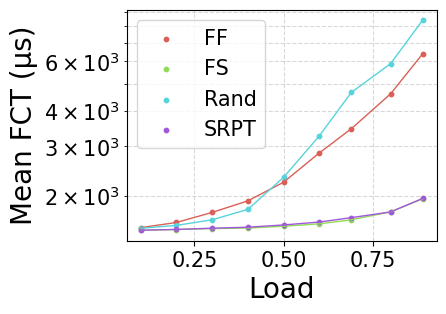

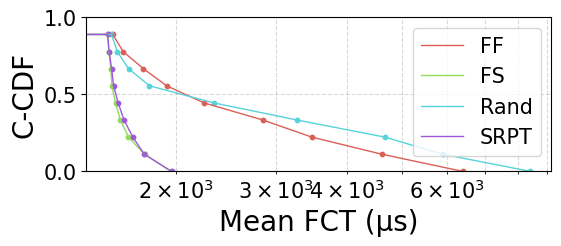

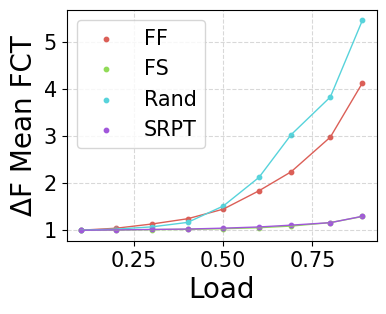

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


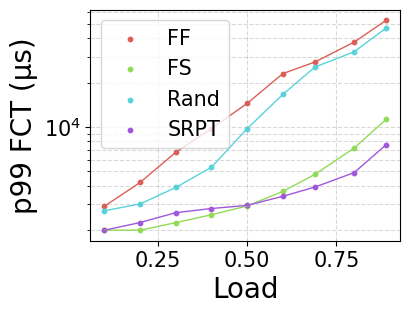

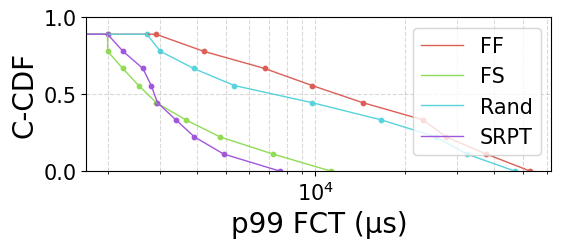

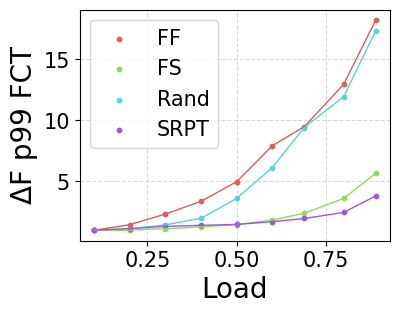

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


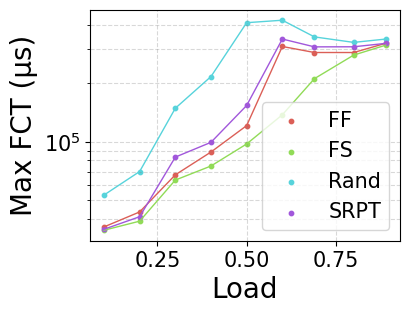

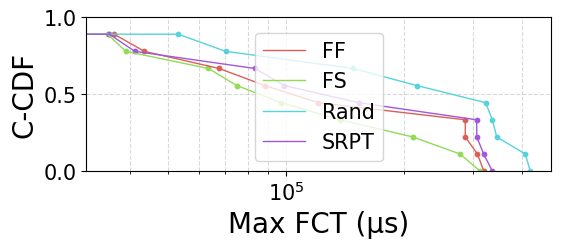

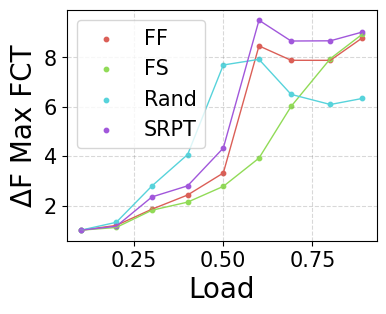

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean



>>>>> Sim rack_dist_sensitivity_0.4 <<<<<


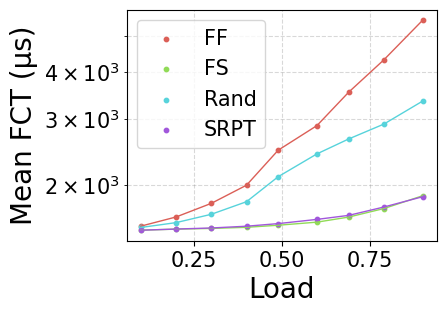

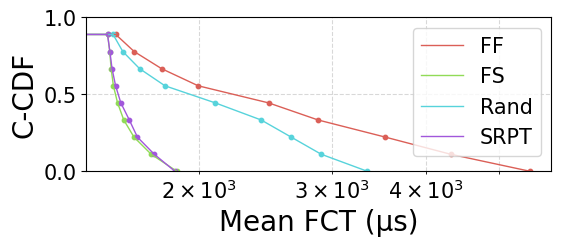

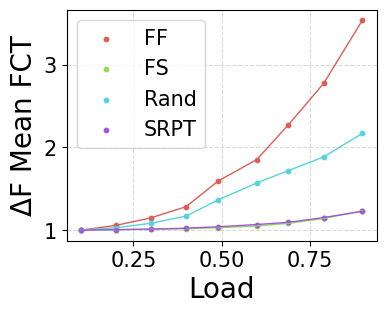

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


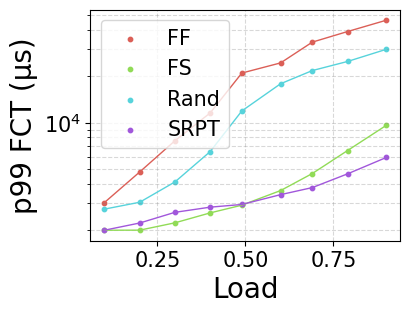

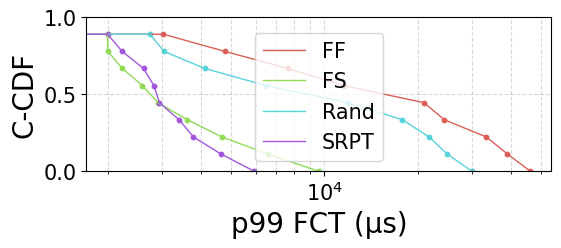

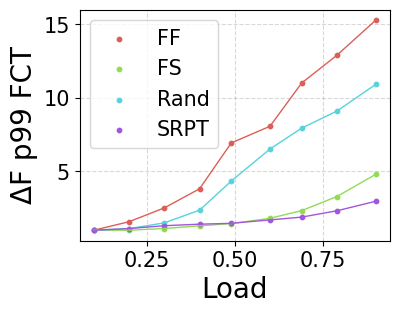

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


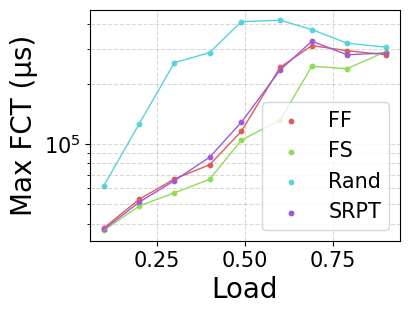

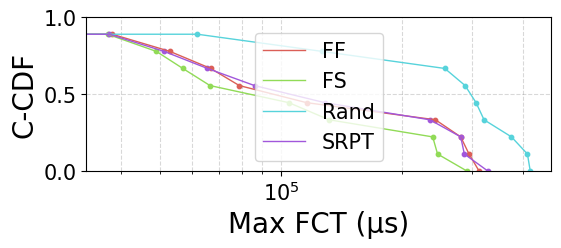

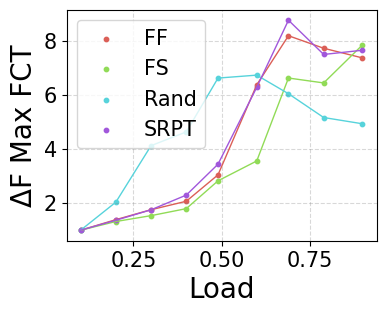

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean



>>>>> Sim rack_dist_sensitivity_0.6 <<<<<


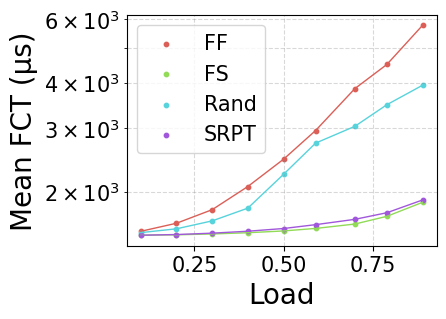

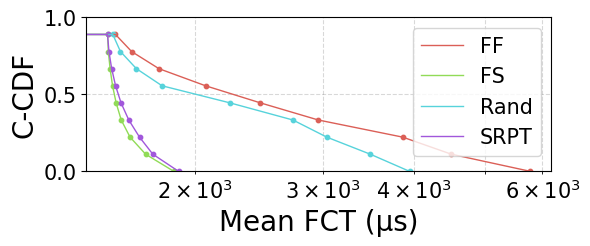

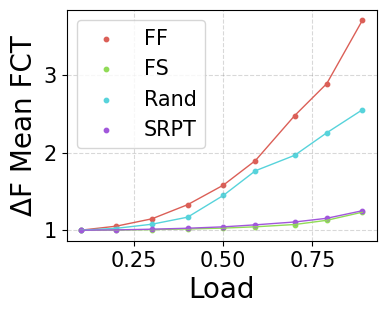

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


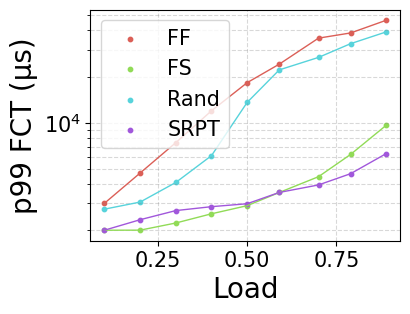

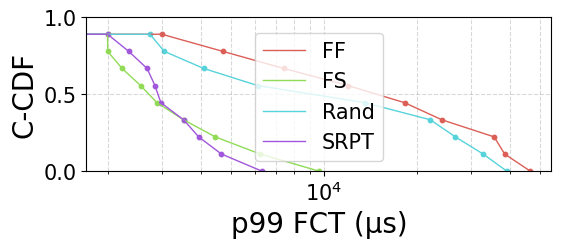

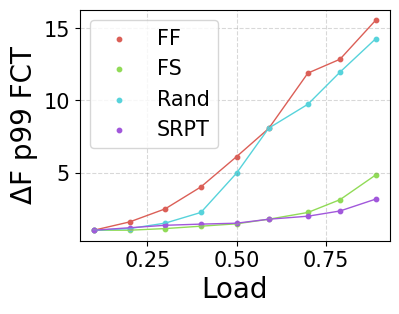

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


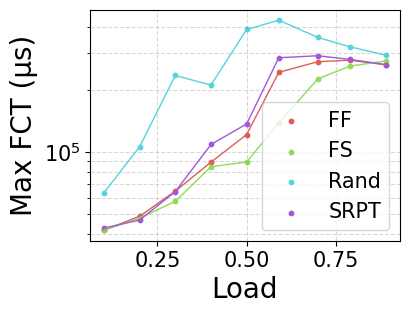

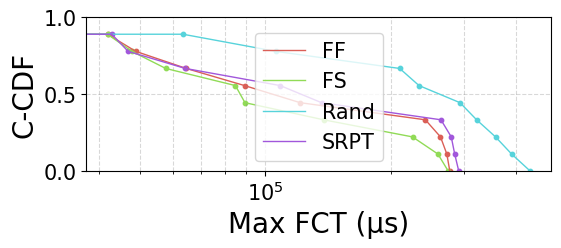

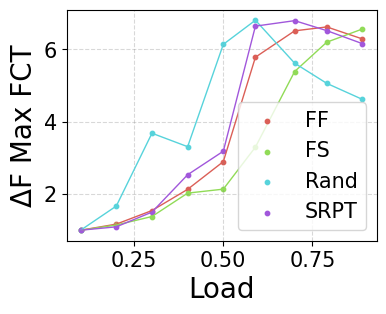

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean



>>>>> Sim rack_dist_sensitivity_0.8 <<<<<


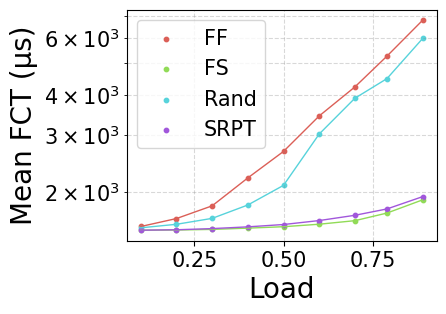

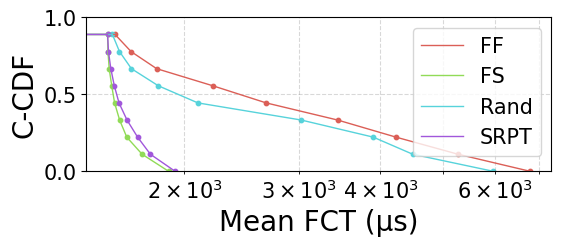

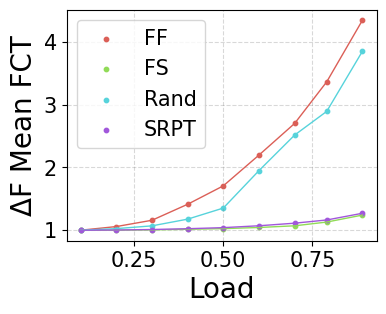

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


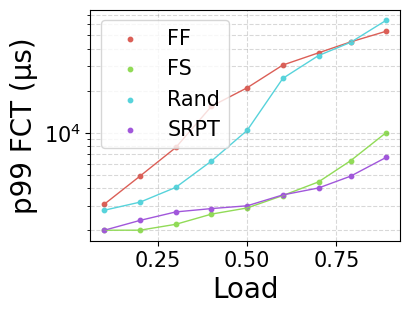

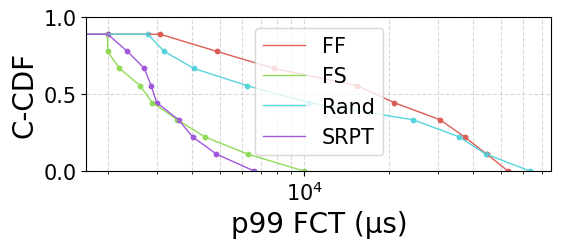

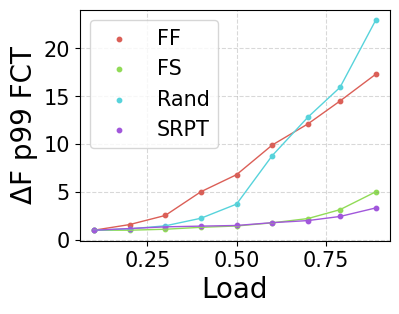

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


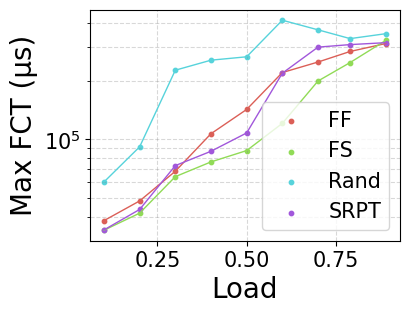

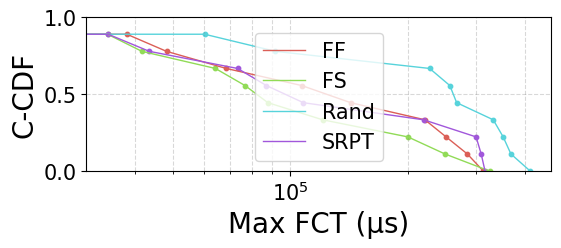

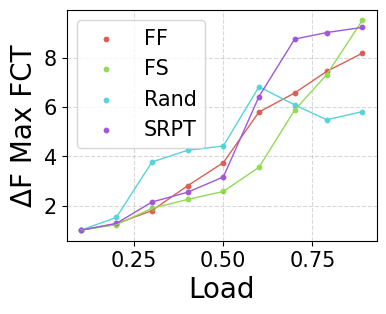

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


In [34]:
# TODO: plot from mean_summary_dataframe and include error bars from std_summary_dataframe

%autoreload
import numpy as np
from trafpy.manager import plot_summary_dict_params




# FLOW COMPLETION METRICS

# subjects_to_plot=['SRPT', 'FS']
subjects_to_plot='all'
control_var_name='Load'
loads=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
font_size=20
# cdf_figsize=(6,2)
cdf_figsize=(6,2)
scatter_figsize=(4,3)

time_units = '\u03BCs'
info_units = 'B'



for sim in mean_summary_dicts.keys():
    print('\n\n\n>>>>> Sim {} <<<<<'.format(sim))
    
    figs = plot_summary_dict_params({0: mean_summary_dicts[sim]}, 
#                                   error_summary_dicts = {0: error_summary_dicts[sim]},
                                  dependent_var_name='Mean FCT ({})'.format(time_units), # don't include units, will include automatically except in delta F plot
                                  control_var_name=control_var_name,
                                  subjects_to_plot=subjects_to_plot,
                                  loads=loads,
                                  font_size=font_size,
                                  logscale=True,
                                  gridlines=True,
                                    use_scientific_notation=True,
                                  cdf_figsize=cdf_figsize, 
                                  scatter_figsize=scatter_figsize,
                                  path_to_save=sim_names[sim])
    

    figs = plot_summary_dict_params({0: mean_summary_dicts[sim]}, 
                                  dependent_var_name='p99 FCT ({})'.format(time_units), # don't include units, will include automatically except in delta F plot
#                                   error_summary_dicts = {0: error_summary_dicts[sim]},
                                  control_var_name=control_var_name,
                                  subjects_to_plot=subjects_to_plot,
                                  loads=loads,
                                  font_size=font_size,
                                  logscale=True,
                                  gridlines=True,
                                    use_scientific_notation=True,
                                  cdf_figsize=cdf_figsize, 
                                  scatter_figsize=scatter_figsize,
                                  path_to_save=sim_names[sim])


    figs = plot_summary_dict_params({0: mean_summary_dicts[sim]}, 
                                  dependent_var_name='Max FCT ({})'.format(time_units), # don't include units, will include automatically except in delta F plot
#                                   error_summary_dicts = {0: error_summary_dicts[sim]},
                                  control_var_name=control_var_name,
                                  subjects_to_plot=subjects_to_plot,
                                  loads=loads,
                                  font_size=font_size,
                                  logscale=True,
                                  gridlines=True,
                                  use_scientific_notation=True,
                                  cdf_figsize=cdf_figsize, 
                                  scatter_figsize=scatter_figsize,
                                  path_to_save=sim_names[sim])



## Plot the mean throughput and accepted metrics




>>>>> Sim rack_dist_sensitivity_0.2 <<<<<


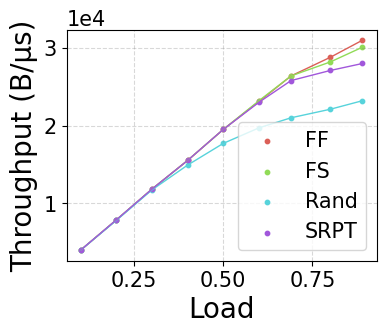

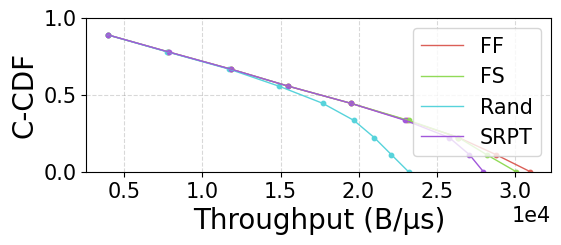

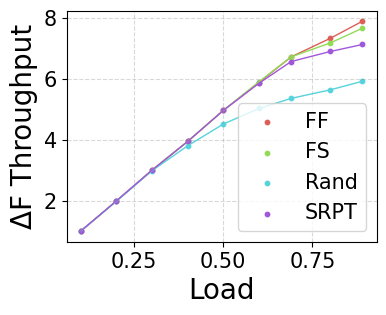

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


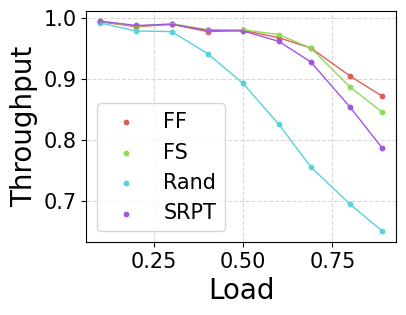

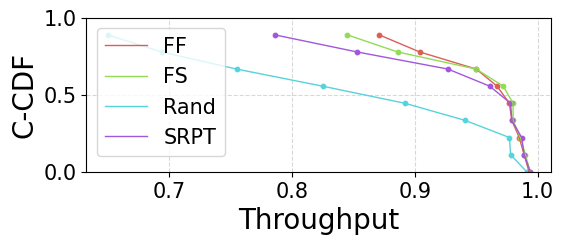

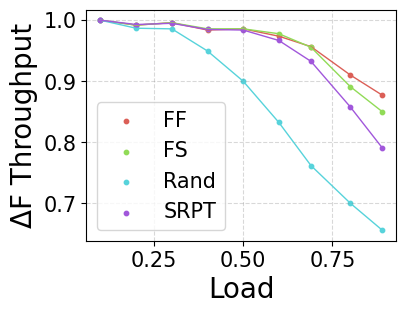

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


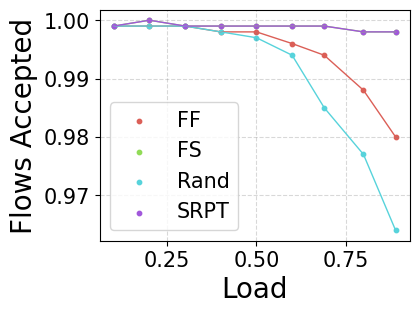

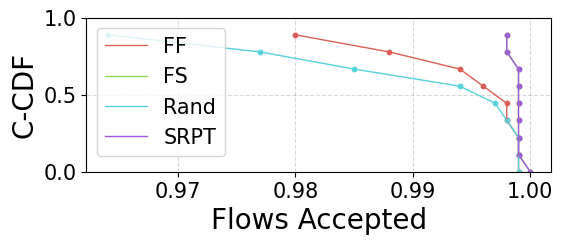

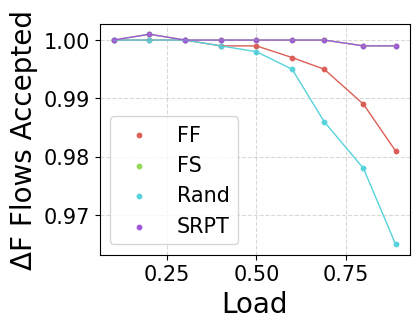

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


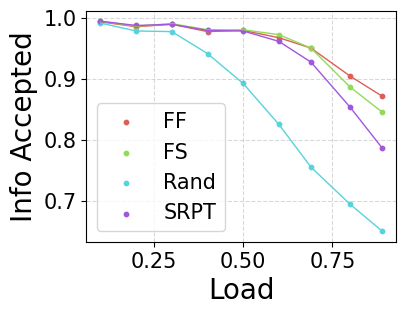

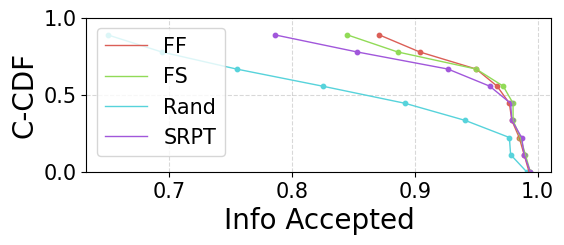

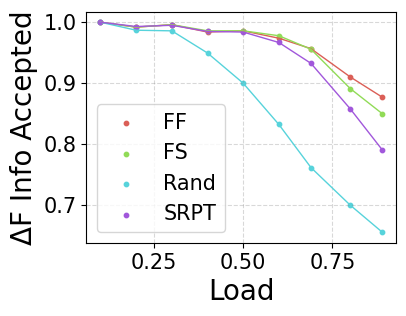

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean



>>>>> Sim rack_dist_sensitivity_0.4 <<<<<


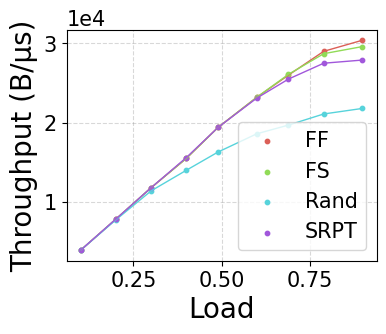

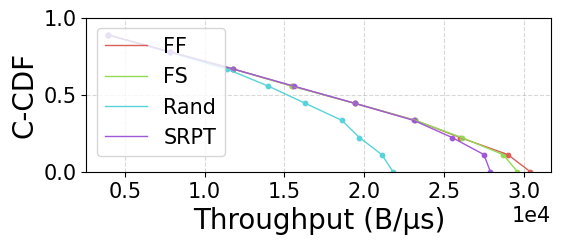

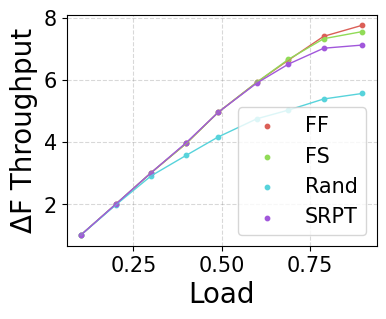

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


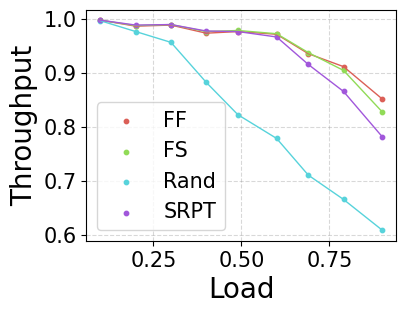

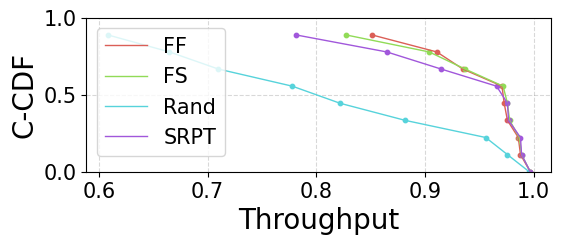

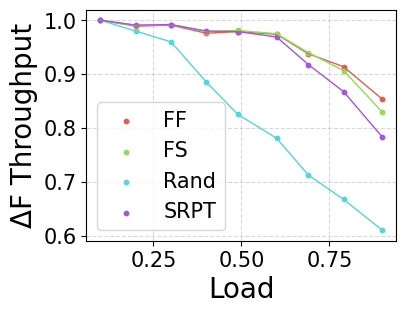

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


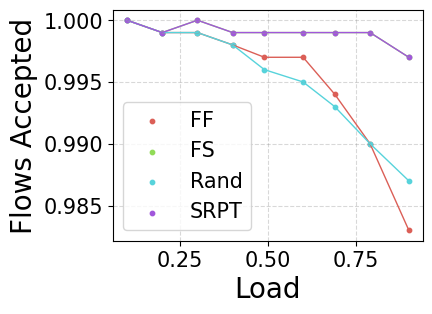

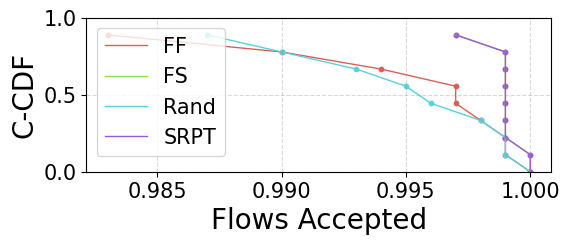

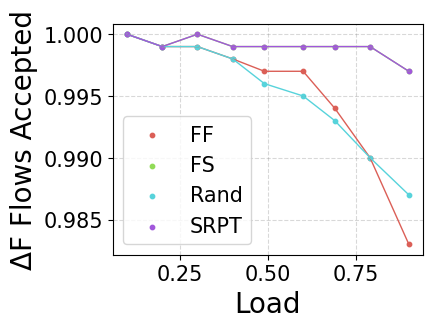

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


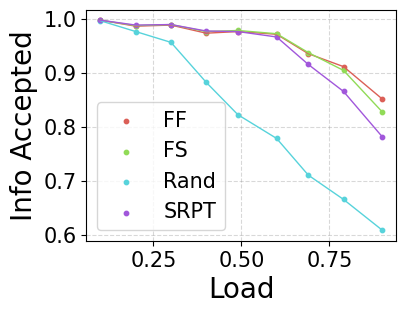

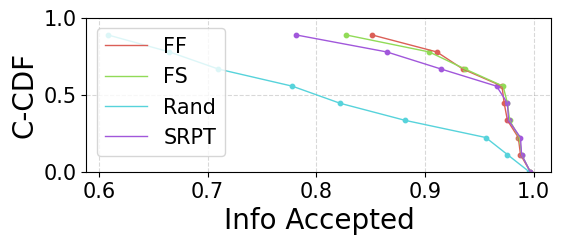

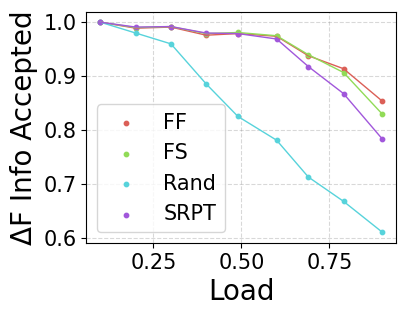

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean



>>>>> Sim rack_dist_sensitivity_0.6 <<<<<


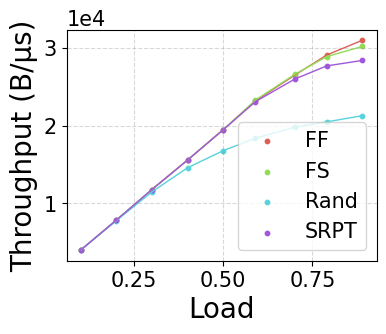

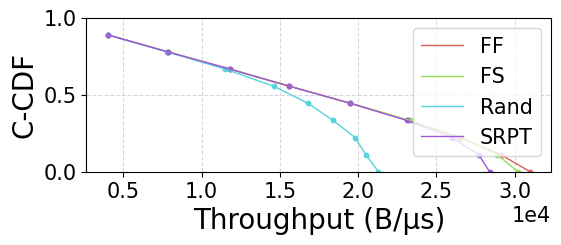

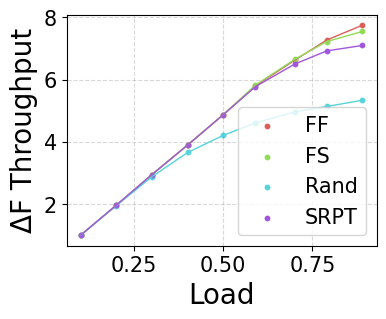

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


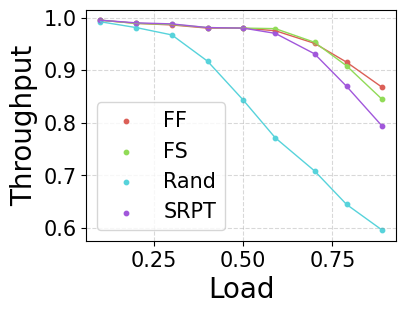

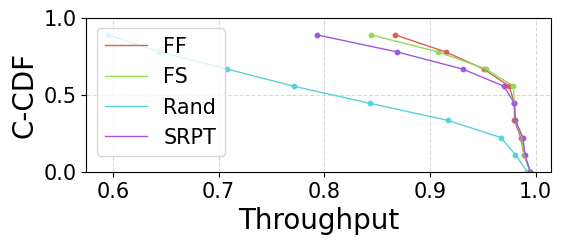

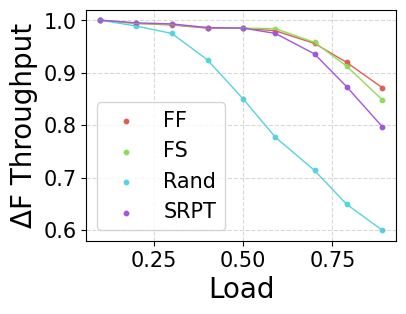

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


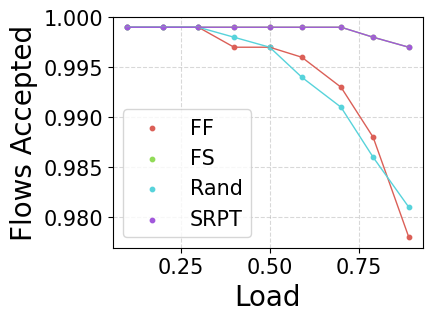

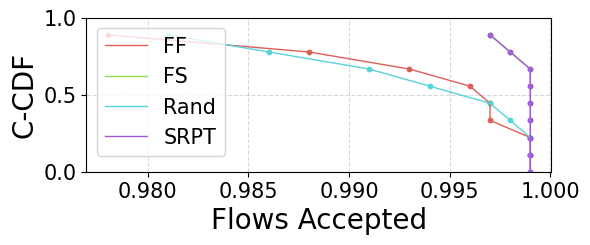

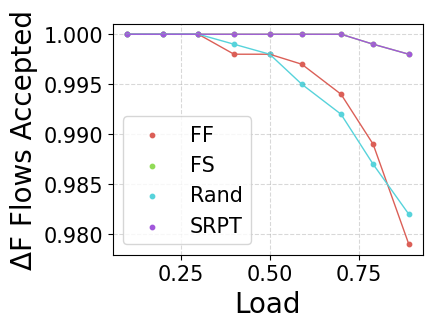

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


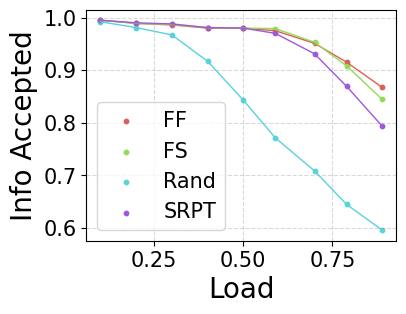

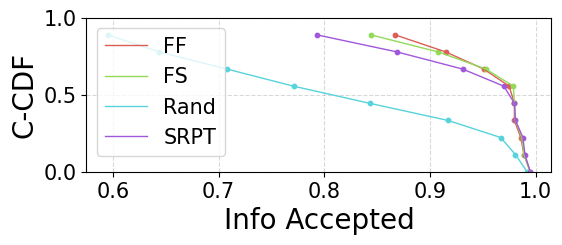

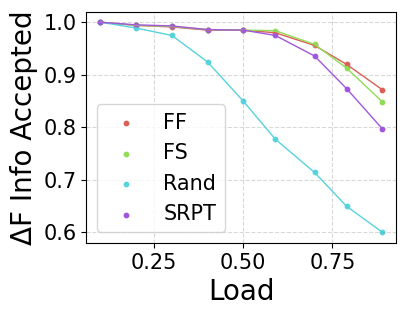

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean



>>>>> Sim rack_dist_sensitivity_0.8 <<<<<


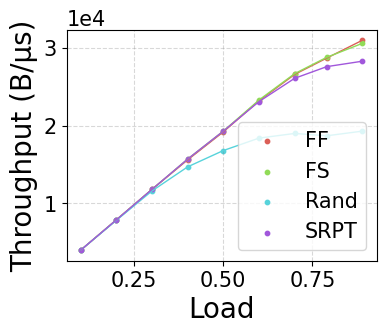

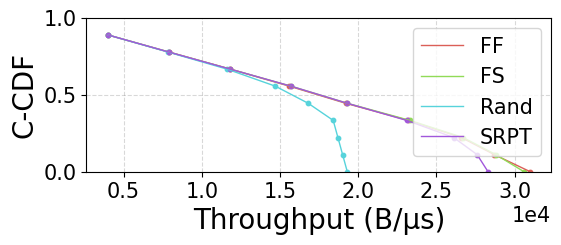

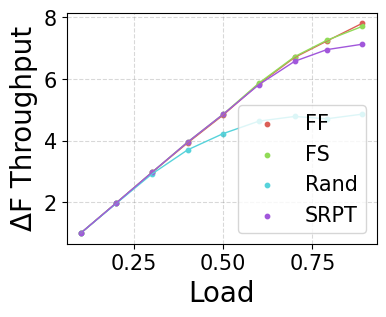

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


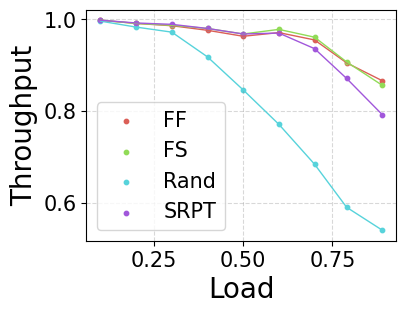

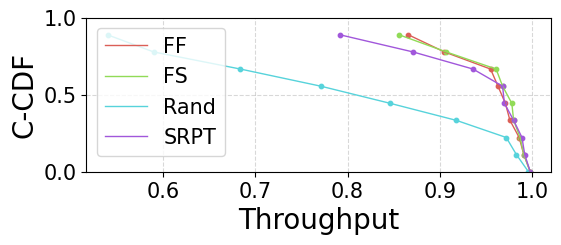

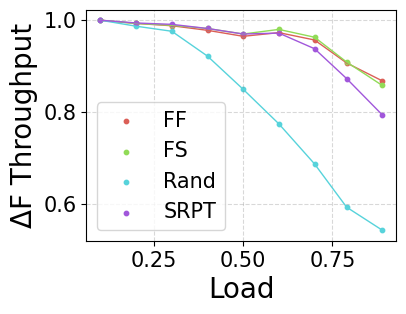

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


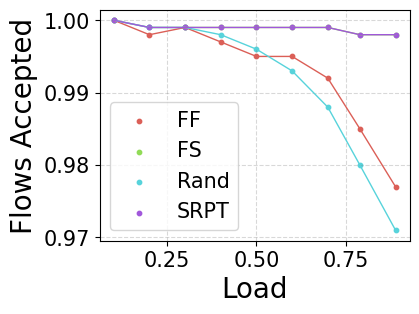

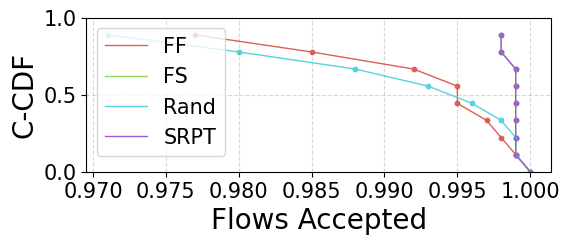

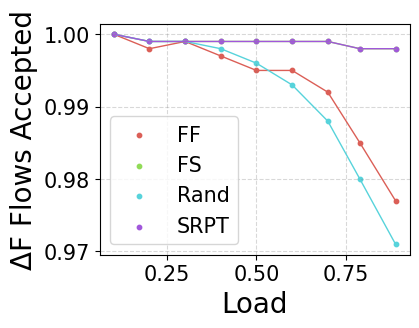

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


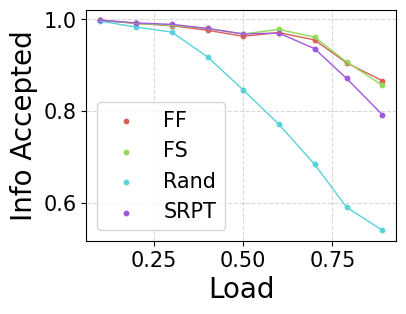

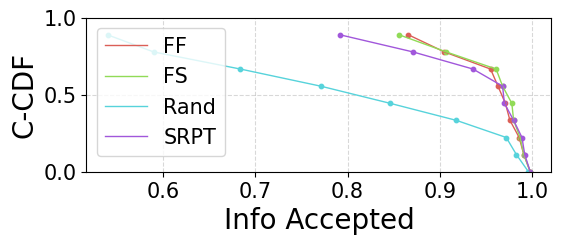

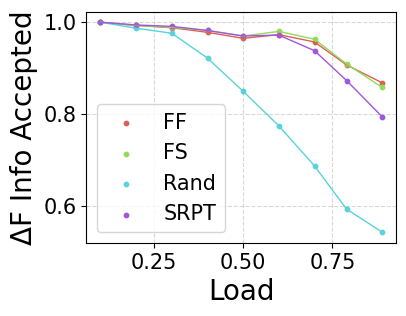

Saved figs to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_mean


In [35]:
%autoreload
import numpy as np
from trafpy.manager import plot_summary_dict_params




# FLOW COMPLETION METRICS

# subjects_to_plot=['SRPT', 'FS']
subjects_to_plot='all'
control_var_name='Load'
loads=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
font_size=20
# cdf_figsize=(6,2)
cdf_figsize=(6,2)
scatter_figsize=(4,3)
time_units = '\u03BCs'
info_units = 'B'



for sim in mean_summary_dicts.keys():
    print('\n\n\n>>>>> Sim {} <<<<<'.format(sim))
    
    figs = plot_summary_dict_params({0: mean_summary_dicts[sim]}, 
#                                   error_summary_dicts = {0: error_summary_dicts[sim]},
                                  dependent_var_name='Throughput (', # for finding in summary dict
                                  dependent_var_display_name='Throughput ({}/{})'.format(info_units, time_units),
                                  control_var_name=control_var_name,
                                  subjects_to_plot=subjects_to_plot,
                                  loads=loads,
                                  font_size=font_size,
                                  logscale=False,
                                  gridlines=True,
                                    use_scientific_notation=True,
                                  cdf_figsize=cdf_figsize, 
                                  scatter_figsize=scatter_figsize,
                                  path_to_save=sim_names[sim])
    
    figs = plot_summary_dict_params({0: mean_summary_dicts[sim]}, 
#                                   error_summary_dicts = {0: error_summary_dicts[sim]},
                                  dependent_var_name='Throughput', # for finding in summary dict
                                  dependent_var_display_name='Throughput'.format(info_units, time_units),
                                  control_var_name=control_var_name,
                                  subjects_to_plot=subjects_to_plot,
                                  loads=loads,
                                  font_size=font_size,
                                  logscale=False,
                                  gridlines=True,
                                    use_scientific_notation=True,
                                  cdf_figsize=cdf_figsize, 
                                  scatter_figsize=scatter_figsize,
                                  path_to_save=sim_names[sim])
    

    figs = plot_summary_dict_params({0: mean_summary_dicts[sim]}, 
                                  dependent_var_name='Flows Accepted', # don't include units, will include automatically except in delta F plot
#                                   error_summary_dicts = {0: error_summary_dicts[sim]},
                                  control_var_name=control_var_name,
                                  subjects_to_plot=subjects_to_plot,
                                  loads=loads,
                                  font_size=font_size,
                                  logscale=False,
                                  gridlines=True,
                                    use_scientific_notation=False,
                                  cdf_figsize=cdf_figsize, 
                                  scatter_figsize=scatter_figsize,
                                  path_to_save=sim_names[sim])


    figs = plot_summary_dict_params({0: mean_summary_dicts[sim]}, 
                                  dependent_var_name='Info Accepted', # don't include units, will include automatically except in delta F plot
#                                   error_summary_dicts = {0: error_summary_dicts[sim]},
                                  control_var_name=control_var_name,
                                  subjects_to_plot=subjects_to_plot,
                                  loads=loads,
                                  font_size=font_size,
                                  logscale=False,
                                  gridlines=True,
                                  use_scientific_notation=False,
                                  cdf_figsize=cdf_figsize, 
                                  scatter_figsize=scatter_figsize,
                                  path_to_save=sim_names[sim])

In [8]:
# TODO: implement winner tables from mean_summary_dataframe